Importing required modules

In [306]:
import os
import numpy as np
import csv
import matplotlib.pyplot as plt

Loading the data

In [307]:
filename = os.path.join("Data","Summary of Weather.csv")
raw_data = open(filename,'rt')
data = np.loadtxt(raw_data,delimiter=',',skiprows=1,usecols=(2,4,6,5))

Cleaning up the data

In [308]:
data = np.around(data)
y = data[:110000,3]
y_test = data[110001:,3]
X = data[:110000,:3]
X_test = data[110001:,:3]
X = np.concatenate([np.ones((len(y),1)), X], axis=1)
X_test = np.concatenate([np.ones((len(y_test),1)), X_test], axis=1)

Visualizing the data

Text(0.5, 1.0, 'Precipitations during the war')

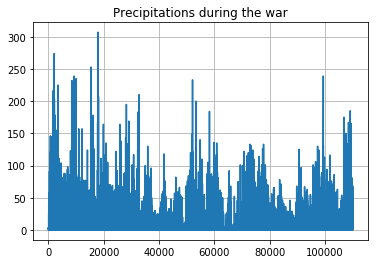

In [309]:
x_axis = np.arange(110000)
plt.plot(x_axis,X[:,1])
plt.grid()
plt.title("Precipitations during the war")


Text(0.5, 1.0, 'Max temperature during the war')

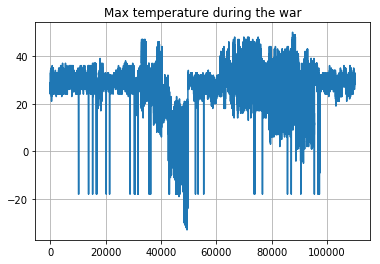

In [310]:
plt.plot(x_axis,X[:,2])
plt.grid()
plt.title("Max temperature during the war")

Text(0.5, 1.0, 'Mean temperature during the war')

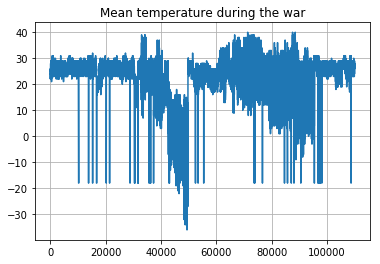

In [311]:
plt.plot(x_axis,X[:,3])
plt.grid()
plt.title("Mean temperature during the war")

In [312]:
theta = np.zeros(4)
iterations = 15000
alpha = 0.0001
J_history = []

In [313]:
#THE COST FUNCTION
def costFunction(X, y, theta):
    m = y.shape[0]
    J = np.sum((X@theta - y)**2)/(2*m)
    return J

In [314]:
#GRADIENT DESCENT
def gradientDescent(X, y, theta, num_iters,J_history):
    m = len(y)
    theta = theta.copy()
    for i in range(num_iters):
        theta = theta - X.T@(X@theta - y)*(alpha/m)
        J_history.append(costFunction(X, y, theta))
    return theta

Text(0.5, 1.0, 'Cost over 15000 iterations')

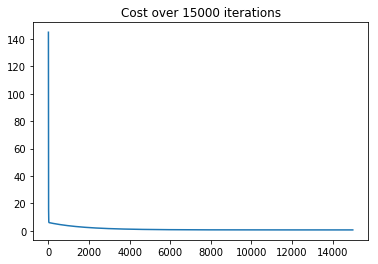

In [315]:
theta = gradientDescent(X, y, theta, iterations, J_history)
plt.plot(np.arange(len(J_history)),J_history)
plt.title("Cost over "+str(iterations)+" iterations")

In [316]:

test_cost = costFunction(X_test, y_test, theta)


The cost on test data was

In [317]:
print(test_cost)

0.896107252683283
